In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [8]:
filename = 'xgb_retail_model.pkl'

loaded_model = joblib.load(filename)
print("Model loaded successfully!")

Model loaded successfully!


In [12]:
data = pd.read_csv('cleaned_dataset.csv')
X_test = data.drop(['Sales', 'Date'], axis=1)
y_test = data['Sales']

In [13]:
cols_to_drop = ['PromoInterval', 'CompetitionOpenDate', 'Date'] 

X_test = X_test.drop(columns=cols_to_drop, errors='ignore')

# This maps 'a','b','c' to 1, 2, 3 and '0' to 0. 
X_test['StateHoliday'] = X_test['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3, 0: 0})

print("Columns in X_test:", X_test.columns.tolist()) # Verify StateHoliday is there

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': loaded_model.predict(X_test)
})

print("Prediction successful!")
print(results.head())

Columns in X_test: ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfYear', 'DaysSinceCompetitionOpen', 'IsPromoMonth', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']
Prediction successful!
   Actual     Predicted
0    5263   5418.429688
1    6064   6061.097656
2    8314   8896.234375
3   13995  12678.085938
4    4822   5587.828125


Top 10 Worst Predictions:
        Actual     Predicted         Error     Abs_Error
686180   33071   6684.113281  26386.886719  26386.886719
688410   30619   6749.528809  23869.471191  23869.471191
44393    41551  17896.785156  23654.214844  23654.214844
697330   25049   5091.909180  19957.090820  19957.090820
716285   27050   7179.703613  19870.296387  19870.296387
679987   24888   7063.542480  17824.457520  17824.457520
711481   20167   3798.519775  16368.480225  16368.480225
35971    29161  12895.687500  16265.312500  16265.312500
191308   28242  12006.157227  16235.842773  16235.842773
743045   21585   5462.458496  16122.541504  16122.541504


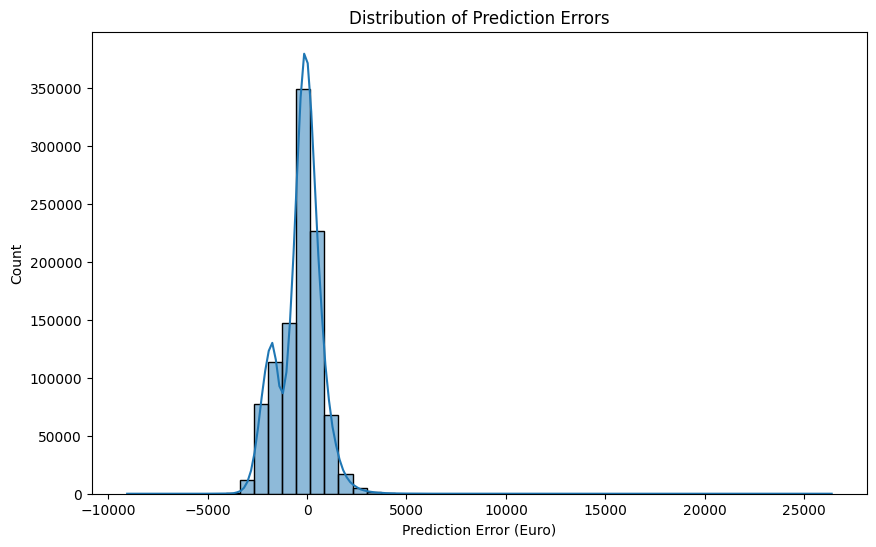

In [14]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': loaded_model.predict(X_test)
})

results['Error'] = results['Actual'] - results['Predicted']
results['Abs_Error'] = abs(results['Error'])

# Sort by worst errors to see what happened
worst_predictions = results.sort_values(by='Abs_Error', ascending=False).head(10)

print("Top 10 Worst Predictions:")
print(worst_predictions)

plt.figure(figsize=(10,6))
sns.histplot(results['Error'], bins=50, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Euro)")
plt.savefig('images/prediction_errors.png', dpi=200)
plt.show()

Visual Forecast for Store 1

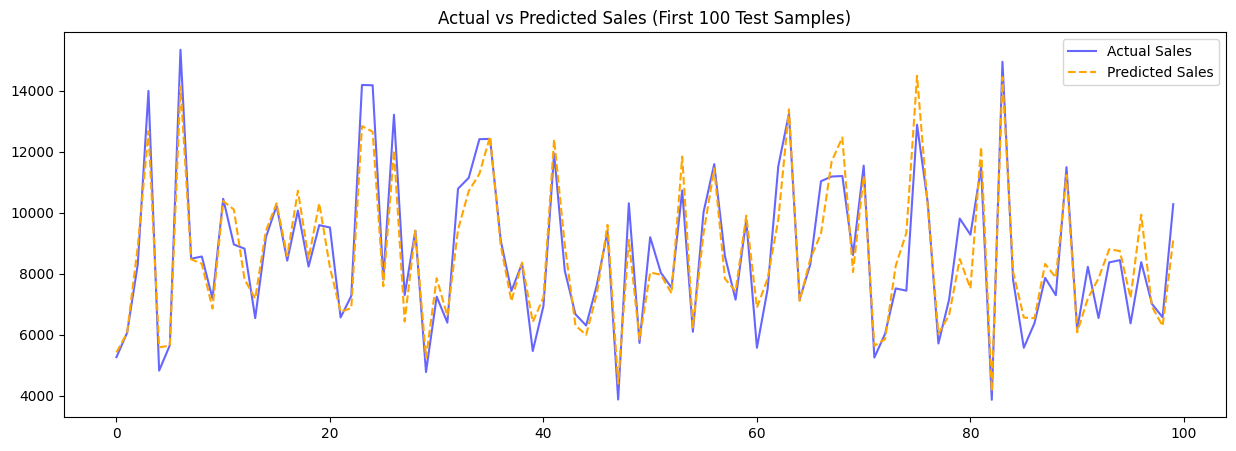

In [15]:
# Simple plotting of the first 100 samples of the test set to see the fit
plt.figure(figsize=(15, 5))
plt.plot(results['Actual'].values[:100], label='Actual Sales', color='blue', alpha=0.6)
plt.plot(results['Predicted'].values[:100], label='Predicted Sales', color='orange', linestyle='--')
plt.title("Actual vs Predicted Sales (First 100 Test Samples)")
plt.legend()
plt.savefig('images/actual_vs_predicted.png', dpi=200)
plt.show()